<a href="https://colab.research.google.com/github/Sreejithm23/Prodigy-Infotech/blob/main/Sentiment_Analysis_Prodigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/twitter_training.csv',header=None)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df.columns=['Id','Entity','Sentiment','Content']
df

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.head()

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.tail()

,Id,Entity,Sentiment,Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [8]:
df.shape

(74682, 4)

In [9]:
df.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df.isna().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [12]:
df.dropna(inplace=True)
df.isna().sum()

Id           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [13]:
df.duplicated().sum()

2340

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

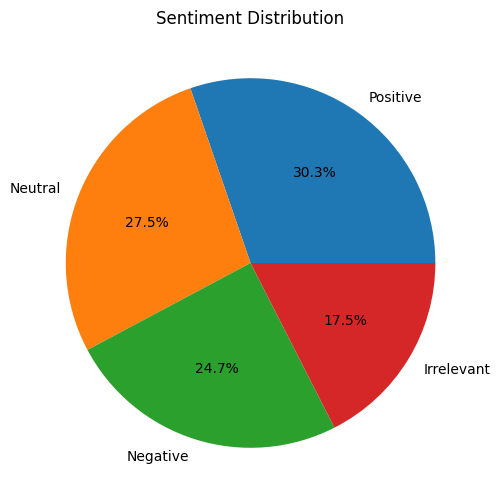

In [24]:
sent_count=df['Sentiment'].value_counts()
label=df['Sentiment'].unique()
plt.figure(figsize=(10,6))
plt.pie(sent_count,labels=label,autopct='%0.1f%%')
plt.title("Sentiment Distribution")
plt.show()

<Axes: xlabel='count', ylabel='Sentiment'>

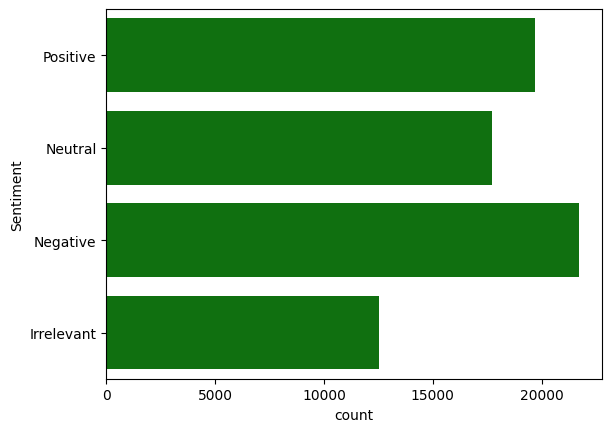

In [29]:
sns.countplot(df['Sentiment'],color='g')

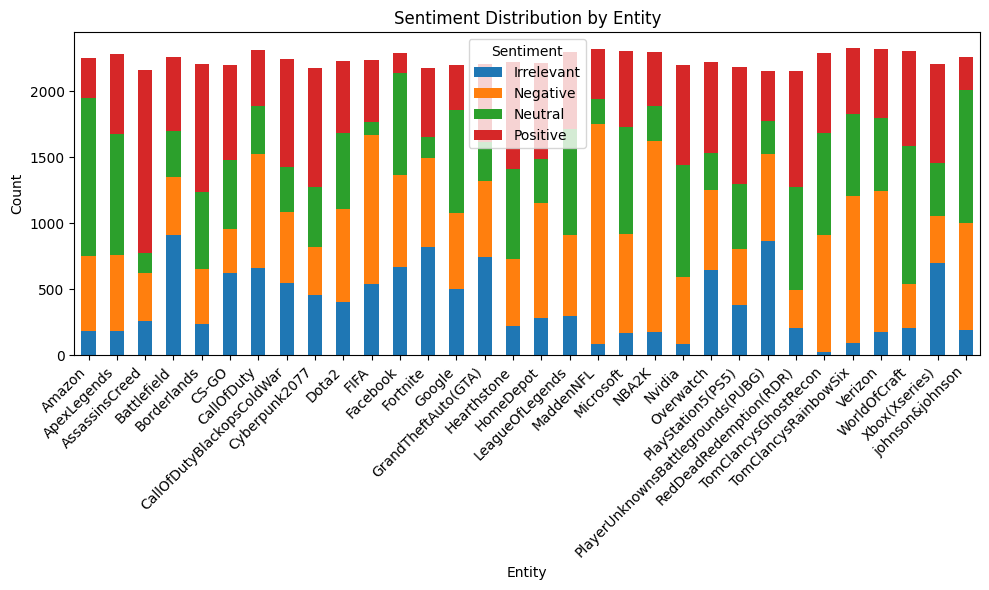

In [31]:
entity_sentiment_counts=df.groupby(['Entity','Sentiment']).size().unstack(fill_value=0)
entity_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Entity')
plt.legend(title='Sentiment')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [35]:
df.pivot_table(columns='Sentiment',index='Entity',aggfunc='size',fill_value=0)

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,972
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


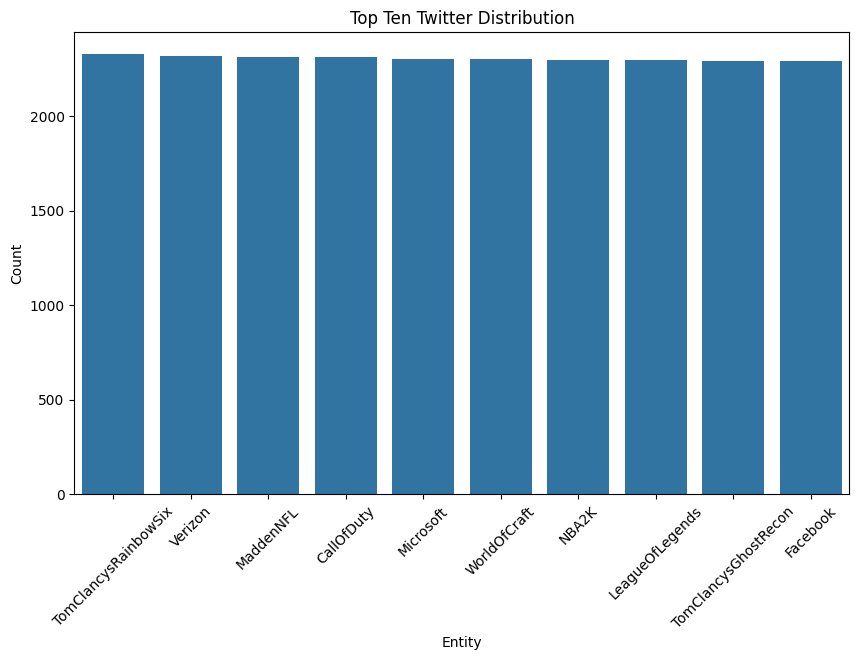

In [36]:
top_ten=df['Entity'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_ten.index,y=top_ten.values)
plt.title('Top Ten Twitter Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

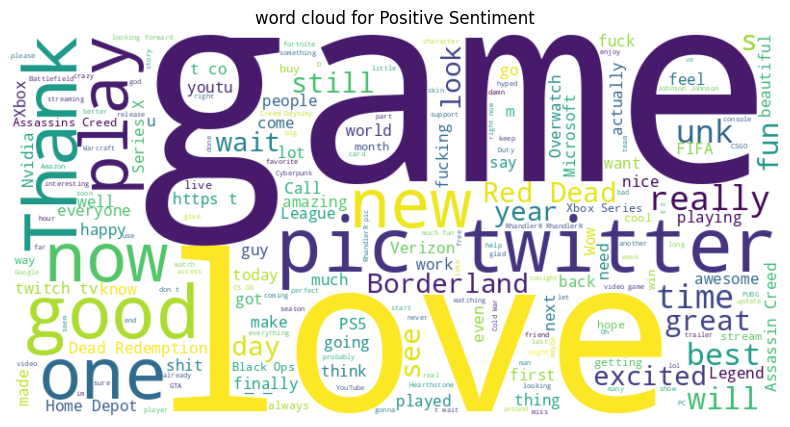

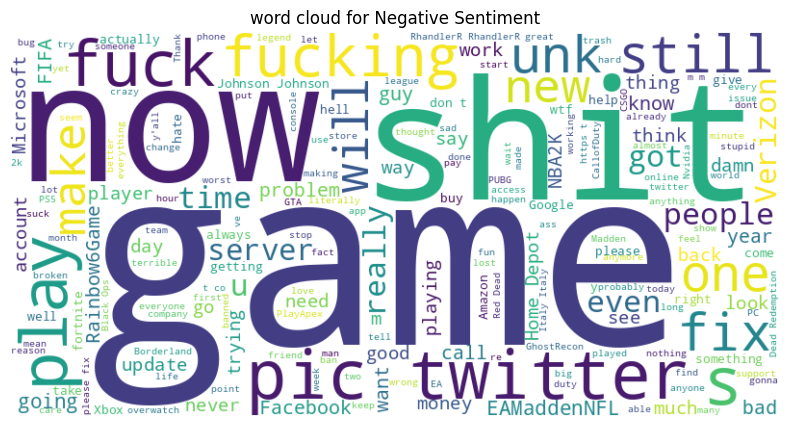

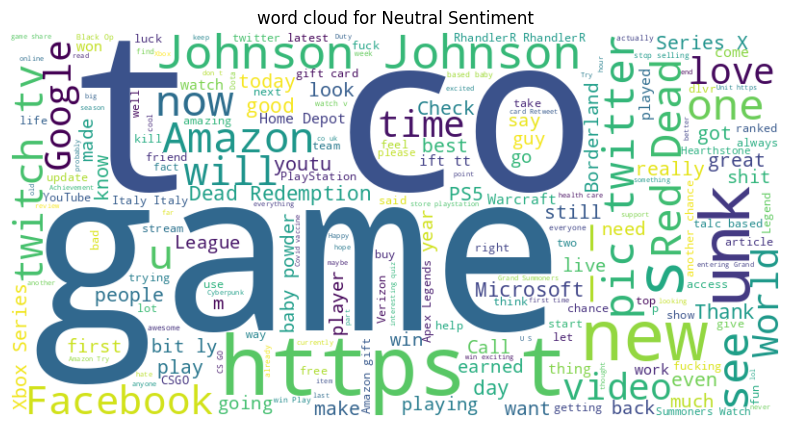

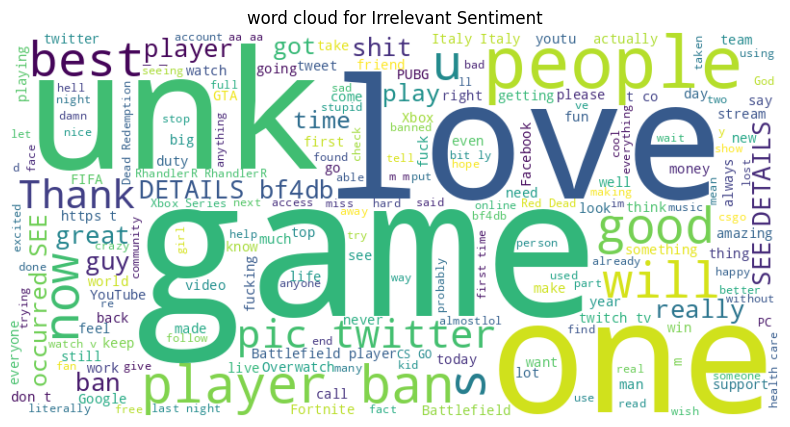

In [47]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
def generate_wordcloud_for_sentiment(df,sentiment):
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(df)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title(f'word cloud for {sentiment} Sentiment')
  plt.show()

positive_text=df[df['Sentiment']=='Positive']['Content'].str.cat(sep=' ')
negative_text=df[df['Sentiment']=='Negative']['Content'].str.cat(sep=' ')
neutral_text=df[df['Sentiment']=='Neutral']['Content'].str.cat(sep=' ')
irrelevant_text=df[df['Sentiment']=='Irrelevant']['Content'].str.cat(sep=' ')

generate_wordcloud_for_sentiment(positive_text,'Positive')
generate_wordcloud_for_sentiment(negative_text,'Negative')
generate_wordcloud_for_sentiment(neutral_text,'Neutral')
generate_wordcloud_for_sentiment(irrelevant_text,'Irrelevant')